Cell 1: **Loading the Data**

In [3]:
# Cell 1
import pandas as pd
!pip install pyLDAvis

file_path = r'/Users/rajanthakulla/Desktop/day2/merged_data_final_no_unnamed.csv'
data = pd.read_csv(file_path)

print("Data Loaded Successfully!")
print(data.head())


Data Loaded Successfully!
                              Review ID      User Name  Rating  \
0  93e6cf46-e937-43c4-947a-12ea027c550b  A Google user       1   
1  57e552d3-97c6-453b-b7f0-41c9164c65fb  A Google user       5   
2  36aa1ad8-ab9d-49cd-946b-73151b5d68d1  A Google user       5   
3  d7499952-8497-48e1-9862-bfd6fcbe1aea  A Google user       5   
4  95dc85e9-8e83-4993-98af-87e96c6e18d7  A Google user       5   

                  Date                                            Content  
0  2023-11-29 04:09:24  Frequent bugs. Today, the IPO tab is not visib...  
1  2025-05-27 14:57:55  This is a stylistic and impressive app! It's w...  
2  2025-05-24 05:34:49  This is an great app. After a couple of months...  
3  2025-05-25 11:22:06  Fantastic app !!! Unfortunately, there’s a per...  
4  2025-05-24 12:35:02  Amazing mallu platform!! After a couple of mon...  


Cell 2: **Pre-processing of Data**

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

required_packages = ['punkt', 'stopwords', 'wordnet', 'omw-1.4', 'punkt_tab']
for package in required_packages:
    try:
        nltk.download(package, force=True)
    except Exception as e:
        print(f"Error downloading {package}: {e}")

reviews = data

print("Columns in the dataset:", reviews.columns)

review_column = 'Content'

def preprocess_text(text):
    if pd.isnull(text):
        return []
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.isalnum() and t not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

reviews['tokens'] = reviews[review_column].apply(preprocess_text)

reviews['word_count'] = reviews['tokens'].apply(len)
reviews = reviews[reviews['word_count'] >= 5]

print(reviews.head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajanthakulla/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajanthakulla/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajanthakulla/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rajanthakulla/nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rajanthakulla/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Columns in the dataset: Index(['Review ID', 'User Name', 'Rating', 'Date', 'Content'], dtype='object')
                              Review ID      User Name  Rating  \
0  93e6cf46-e937-43c4-947a-12ea027c550b  A Google user       1   
1  57e552d3-97c6-453b-b7f0-41c9164c65fb  A Google user       5   
2  36aa1ad8-ab9d-49cd-946b-73151b5d68d1  A Google user       5   
3  d7499952-8497-48e1-9862-bfd6fcbe1aea  A Google user       5   
4  95dc85e9-8e83-4993-98af-87e96c6e18d7  A Google user       5   

                  Date                                            Content  \
0  2023-11-29 04:09:24  Frequent bugs. Today, the IPO tab is not visib...   
1  2025-05-27 14:57:55  This is a stylistic and impressive app! It's w...   
2  2025-05-24 05:34:49  This is an great app. After a couple of months...   
3  2025-05-25 11:22:06  Fantastic app !!! Unfortunately, there’s a per...   
4  2025-05-24 12:35:02  Amazing mallu platform!! After a couple of mon...   

                                     

Cell 3: **Topic Modeling Using LDA**

In [5]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(analyzer=lambda x: x)
dtm = vectorizer.fit_transform(reviews['tokens'])

n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

words = vectorizer.get_feature_names_out()
topics = {}
for idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics[f"Topic {idx+1}"] = top_words

for topic, top_words in topics.items():
    print(f"{topic}: {', '.join(top_words)}")


Topic 1: hai, service, customer, good, time, account, trading, one, angel, app
Topic 2: money, bad, caller, available, set, worst, song, tune, app, jio
Topic 3: spotify, listen, time, ca, even, play, premium, ad, app, song
Topic 4: quality, gaana, nice, like, love, best, good, music, song, app
Topic 5: playing, please, new, play, music, spotify, update, playlist, app, song


ADDED SENTIMENT ANALYSIS (Can be removed)

/var/folders/3d/0453f8k526zd5h4x2_k_kymc0000gn/T/ipykernel_17537/4209058802.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews[['polarity', 'subjectivity']] = reviews[review_column].apply(analyze_sentiment)
/var/folders/3d/0453f8k526zd5h4x2_k_kymc0000gn/T/ipykernel_17537/4209058802.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews[['polarity', 'subjectivity']] = reviews[review_column].apply(analyze_sentiment)


Sentiment Analysis Summary:
            polarity   subjectivity
count  293145.000000  293145.000000
mean        0.132064       0.517260
std         0.399382       0.257133
min        -1.000000       0.000000
25%        -0.065476       0.383333
50%         0.100000       0.533333
75%         0.400000       0.677273
max         1.000000       1.000000


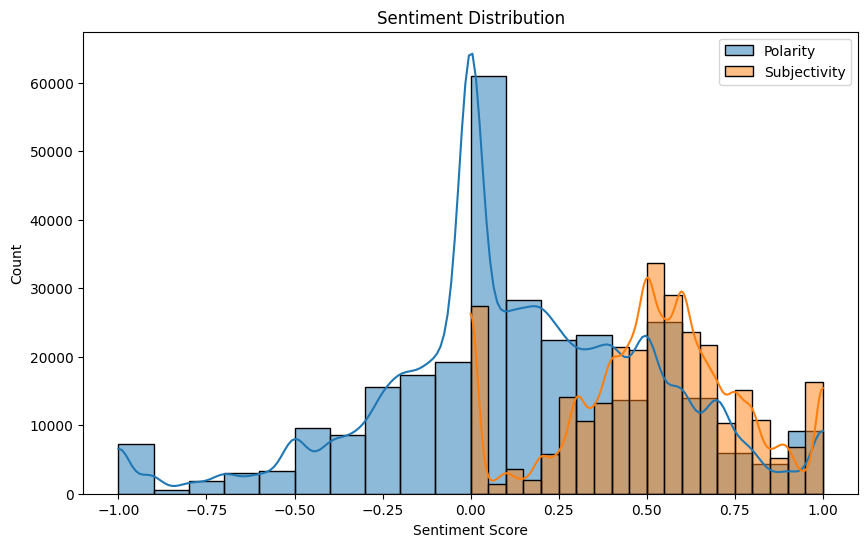

In [6]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_sentiment(text):
    if pd.isnull(text) or not text:
        return pd.Series([None, None], index=['polarity', 'subjectivity'])
    analysis = TextBlob(text)
    return pd.Series([analysis.polarity, analysis.subjectivity], index=['polarity', 'subjectivity'])

reviews[['polarity', 'subjectivity']] = reviews[review_column].apply(analyze_sentiment)

print("Sentiment Analysis Summary:")
print(reviews[['polarity', 'subjectivity']].describe())

plt.figure(figsize=(10, 6))
sns.histplot(reviews['polarity'], bins=20, kde=True, label='Polarity')
sns.histplot(reviews['subjectivity'], bins=20, kde=True, label='Subjectivity')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()


Cell 4: **Visualize Topics After LDA**

In [7]:
# Patch CountVectorizer to support pyLDAvis on newer sklearn versions
if not hasattr(vectorizer, 'get_feature_names'):
    vectorizer.get_feature_names = vectorizer.get_feature_names_out


In [8]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.sklearn.prepare(lda_model, dtm, vectorizer, sort_topics=False)
lda_display


/opt/anaconda3/envs/bootcamp/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.260095  0.043709       1        1  16.419106
1      0.039570 -0.120204       2        1  16.277400
2     -0.092690  0.045385       3        1  26.281838
3     -0.106495 -0.119819       4        1  18.991452
4     -0.100480  0.150929       5        1  22.030204, topic_info=        Term           Freq          Total Category  logprob  loglift
33346    jio   42030.000000   42030.000000  Default  30.0000  30.0000
63126   tune   29314.000000   29314.000000  Default  29.0000  29.0000
57187   song  172667.000000  172667.000000  Default  28.0000  28.0000
41344  music   75092.000000   75092.000000  Default  27.0000  27.0000
6400     app  219360.000000  219360.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
43721    one    5579.207023   36220.197145   Topic5  -5.2349  -0.3578
26546    get    5153.865107   22551.804144   Topic5  -5.3142   0.0367
5257    also    5157.658883   24482.700344   Topic5  -5.3135  -0.0447
3922     add    4915.149935   19602.267541   Topic5  -5.3616   0.1294
22504   even    4784.526459   32018.030453   Topic5  -5.3886  -0.3882

[414 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
148        3  0.965332  100mbps
1287       2  0.997250      299
1321       3  0.975829      2gb
1423       1  0.039066       30
1423       2  0.024564       30
...      ...       ...      ...
68522      2  0.932263     wynk
68522      3  0.030557     wynk
68522      4  0.036990     wynk
68522      5  0.000536     wynk
69322      1  0.999264  zerodha

[924 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

Cell: 5 **Word Clouds for Topics**

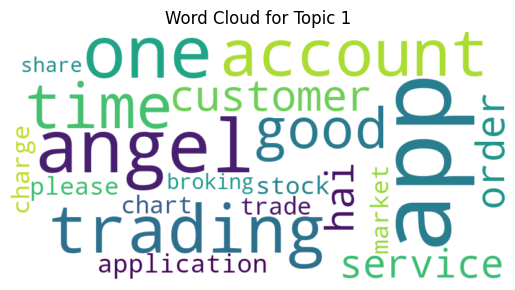

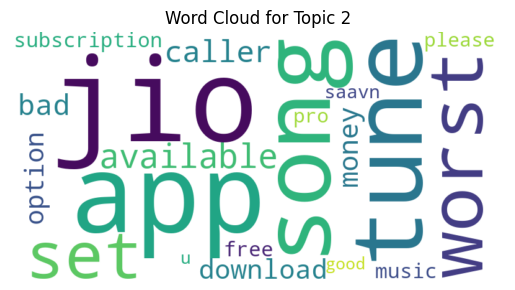

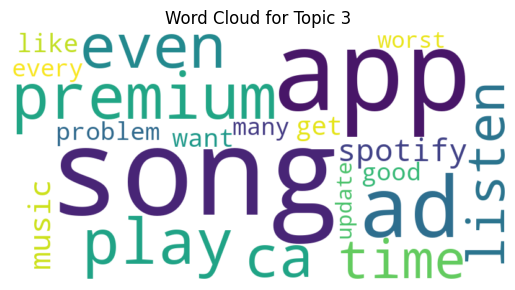

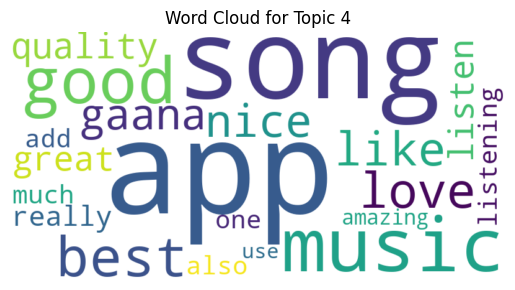

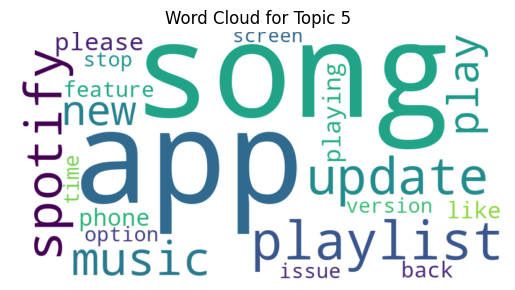

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(lda_model, num_topics, feature_names, num_words=20):
    for t in range(num_topics):
        plt.figure()
        topic_words = {feature_names[i]: lda_model.components_[t][i] for i in lda_model.components_[t].argsort()[-num_words:]}
        wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(topic_words)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for Topic {t+1}")
    plt.show()

create_wordcloud(lda_model, n_topics, words)


Cell 6: **Inter-Rater Reliability** (Cohen's Kappa Coefficient)

In [13]:
import statsmodels.api as sm
import numpy as np

X = reviews[['word_count']]

X = sm.add_constant(X)

y = reviews['Rating']

ols_model = sm.OLS(y, X).fit()

coefficients = np.abs(ols_model.params[1:])
relative_importance = coefficients / coefficients.sum()

print("Relative Importance of Determinants:")
print(relative_importance)

Relative Importance of Determinants:
word_count    1.0
dtype: float64


* *italicised text*Graph between coherence score and number of topics*

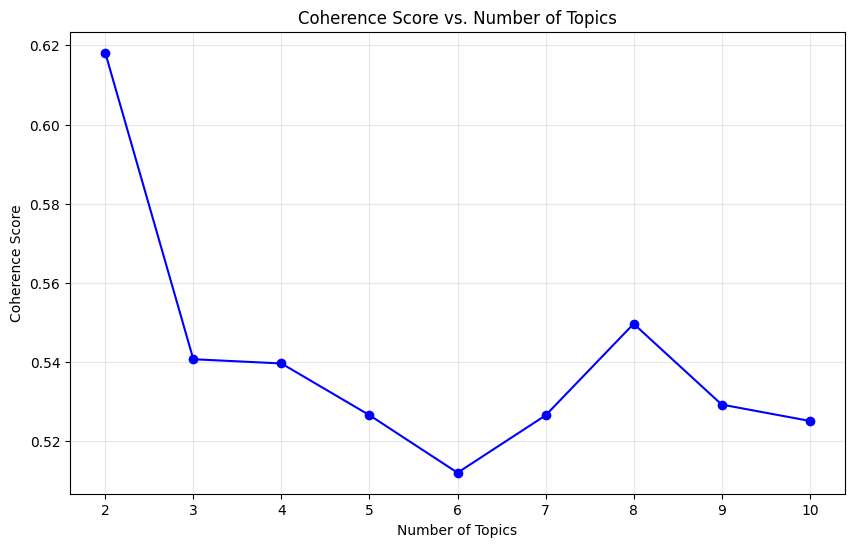

In [14]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim import corpora, models

topic_range = range(2, 11)
coherence_scores = []

dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]

for num_topics in topic_range:
    lda_temp = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=10, per_word_topics=True)
    coherence_model = CoherenceModel(model=lda_temp, texts=reviews['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

plt.figure(figsize=(10, 6))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.grid(alpha=0.3)
plt.show()

Cell 7: **Multiple Regression Analysis** (Statistical Analysis)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = reviews[['word_count']]
y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.8070448539612984
R-squared: 0.05036172967257868


Cell 8: **Relative Importance of Determinants** (Dominance Analysis)

In [16]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()

coefficients = np.abs(ols_model.params[1:])
relative_importance = coefficients / coefficients.sum()

print("Relative Importance of Determinants:")
print(relative_importance)


Relative Importance of Determinants:
word_count    1.0
dtype: float64


*Bar Chart for Visualization of Relative Importance of Determinants*

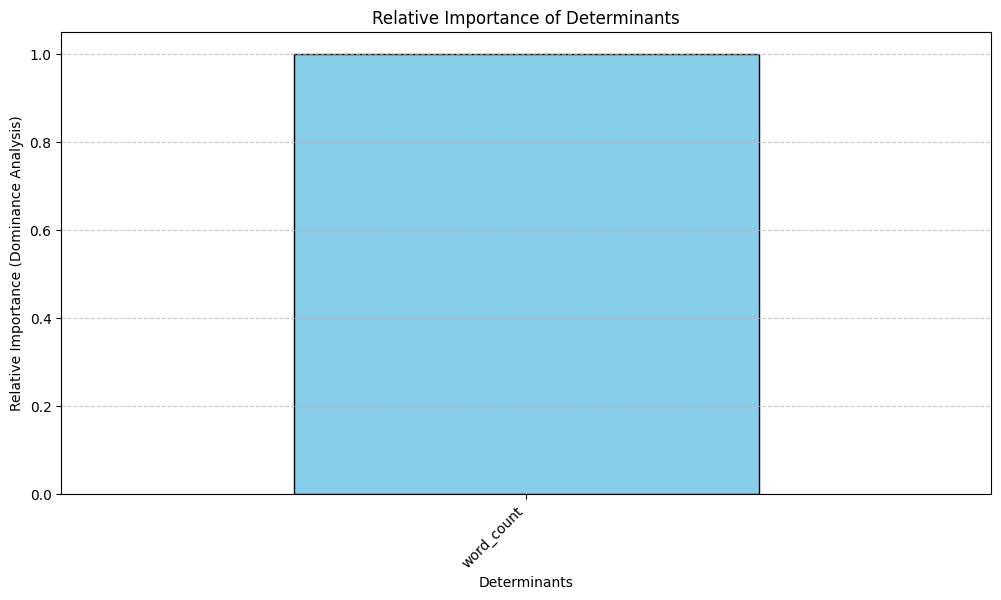

In [17]:
importances = pd.Series(relative_importance)

sorted_importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sorted_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Relative Importance of Determinants')
plt.ylabel('Relative Importance (Dominance Analysis)')
plt.xlabel('Determinants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cell 9: **Correspondence Analysis**

In [18]:
from sklearn.decomposition import TruncatedSVD

cross_tab = pd.crosstab(reviews['Rating'], reviews['word_count'])

svd = TruncatedSVD(n_components=2)
ca_result = svd.fit_transform(cross_tab)

ca_df = pd.DataFrame(ca_result, columns=['Dimension 1', 'Dimension 2'], index=cross_tab.index)

print("Correspondence Analysis Results:")
print(ca_df)


Correspondence Analysis Results:
         Dimension 1  Dimension 2
Rating                           
1       24887.193765 -5458.287870
2        4411.613066 -1227.639939
3        4978.131115  -568.526213
4        7402.246326   669.788697
5       23444.393605  5934.450671


*Scatterplot for Correspondence Analysis of Determinants and Ratings*

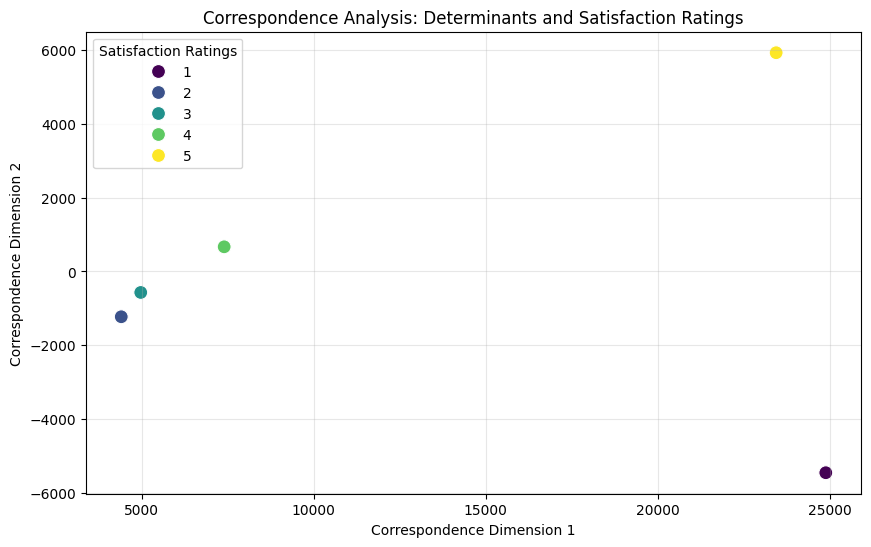

In [19]:
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

cross_tab = pd.crosstab(reviews['Rating'], reviews['word_count'])
svd = TruncatedSVD(n_components=2)
determinant_scores = svd.fit_transform(cross_tab)

unique_ratings = cross_tab.index
x_values = determinant_scores[:, 0]
y_values = determinant_scores[:, 1]

plot_df = pd.DataFrame({'Rating': unique_ratings, 'Dimension 1': x_values, 'Dimension 2': y_values})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Dimension 1', y='Dimension 2', hue='Rating', palette='viridis', s=100, edgecolor='w')
plt.title('Correspondence Analysis: Determinants and Satisfaction Ratings')
plt.xlabel('Correspondence Dimension 1')
plt.ylabel('Correspondence Dimension 2')
plt.legend(title='Satisfaction Ratings')
plt.grid(alpha=0.3)
plt.show()

Cell 10: **Save Outputs**

In [22]:
processed_data_path = "/Users/rajanthakulla/Desktop/day2/processed_reviews.csv"
reviews.to_csv(processed_data_path, index=False)

topics_path = "/Users/rajanthakulla/Desktop/day2/topics.txt"
with open(topics_path, 'w') as f:
    for topic, top_words in topics.items():
        f.write(f"{topic}: {', '.join(top_words)}\n")

regression_results_path = "/Users/rajanthakulla/Desktop/day2/regression_results.txt"
with open(regression_results_path, 'w') as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"R-squared: {r2}\n")

print(f"Processed reviews saved to: {processed_data_path}")
print(f"Topics saved to: {topics_path}")
print(f"Regression results saved to: {regression_results_path}")


Processed reviews saved to: /Users/rajanthakulla/Desktop/day2/processed_reviews.csv
Topics saved to: /Users/rajanthakulla/Desktop/day2/topics.txt
Regression results saved to: /Users/rajanthakulla/Desktop/day2/regression_results.txt
